<a href="https://colab.research.google.com/github/Sriharshitha842/ML_LAB/blob/main/ML_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name of the Student : Sriharshitha Deepala**

**Reg No : 19BCD7246**

**Course Code : CSE3008**

**Lab No : 03**

# **ID3 decision tree for classification**

**1. PlayTennis.csv**

In [26]:
import numpy as np
import pandas as pd

In [27]:
playtennis = pd.read_csv('/content/sample_data/PlayTennis.csv')
print(playtennis)

     Outlook Temperature Humidity    Wind PlayTennis
0      Sunny         Hot     High    Weak         No
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No


In [28]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()
playtennis['Outlook']=L.fit_transform(playtennis['Outlook'])
playtennis['Temperature']=L.fit_transform(playtennis['Temperature'])
playtennis['Humidity']=L.fit_transform(playtennis['Humidity'])
playtennis['Wind']=L.fit_transform(playtennis['Wind'])
playtennis['PlayTennis']=L.fit_transform(playtennis['PlayTennis'])
print(playtennis)




    Outlook  Temperature  Humidity  Wind  PlayTennis
0         2            1         0     1           0
1         2            1         0     0           0
2         0            1         0     1           1
3         1            2         0     1           1
4         1            0         1     1           1
5         1            0         1     0           0
6         0            0         1     0           1
7         2            2         0     1           0
8         2            0         1     1           1
9         1            2         1     1           1
10        2            2         1     0           1
11        0            2         0     0           1
12        0            1         1     1           1
13        1            2         0     0           0


[Text(148.8, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'), Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'), Text(186.0, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'), Text(111.60000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'), Text(74.4, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'), Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(148.8, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'), Text(260.40000000000003, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'), Text(223.20000000000002, 65.232, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'), Text(186.0, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(260.40000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(297.6, 65.232, 'entropy = 

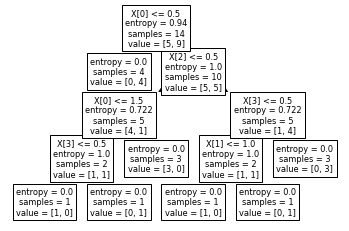

In [29]:
from sklearn import tree
Y = playtennis['PlayTennis']
X = playtennis.drop(['PlayTennis'], axis =1)
c = tree.DecisionTreeClassifier(criterion = 'entropy')
c = c.fit(X,Y)
print(tree.plot_tree(c))

In [30]:
import graphviz

data = tree.export_graphviz(c)
graph = graphviz.Source(data)


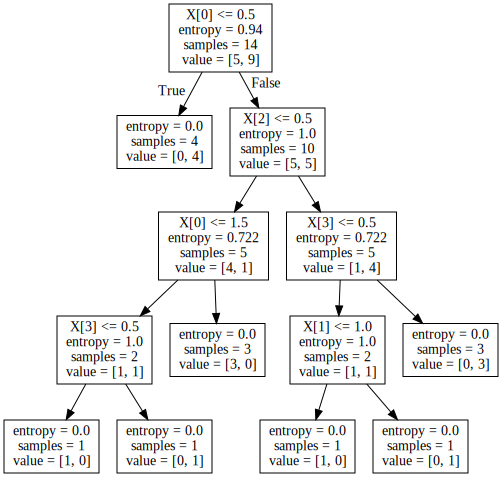

In [31]:
graph

**2. PlayTennisTest.csv**

In [32]:
playtennistest = pd.read_csv('/content/sample_data/PlayTennisTest.csv')
print(playtennistest)

  Outlook Temperature Humidity    Wind PlayTennis
0   Sunny         Hot   Normal    Weak          ?
1    Rain        Mild     High  Strong          ?


In [33]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
playtennistest['Outlook']=l.fit_transform(playtennistest['Outlook'])
playtennistest['Temperature']=l.fit_transform(playtennistest['Temperature'])
playtennistest['Humidity']=l.fit_transform(playtennistest['Humidity'])
playtennistest['Wind']=l.fit_transform(playtennistest['Wind'])
playtennistest['PlayTennis']=l.fit_transform(playtennistest['PlayTennis'])
print(playtennistest)

   Outlook  Temperature  Humidity  Wind  PlayTennis
0        1            0         1     1           0
1        0            1         0     0           0


[Text(167.4, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = 2.0')]


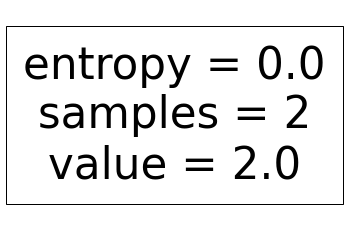

In [34]:
from sklearn import tree
Y = playtennistest['PlayTennis']
X = playtennistest.drop(['PlayTennis'], axis =1)
C = tree.DecisionTreeClassifier(criterion = 'entropy')
C = C.fit(X,Y)
print(tree.plot_tree(C))

In [35]:
import graphviz

Data = tree.export_graphviz(C)
Graph = graphviz.Source(Data)

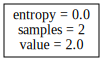

In [36]:
Graph